In [1]:
!pip install easyocr
!pip install imutils

In [2]:
pip install opencv-python-headless==4.5.1.48

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
from matplotlib import pyplot as plt 
import imutils
import numpy as np
import easyocr
import os 

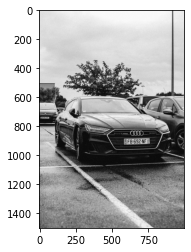

In [62]:
IMAGE=cv2.imread("./IMAGES/image_1_car_plate_number.jpg")
#IMAGE=cv2.imread("./IMAGES/a79d52c1348a467f83b512669f1e8584.jpg")

#print(IMAGE)
plt.imshow(IMAGE)
gray_img=cv2.cvtColor(IMAGE,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB))
#plt.imshow(gray_img)

Apply a filter

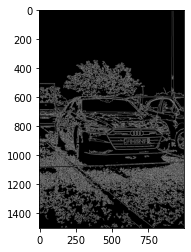

In [63]:
bfilter=cv2.bilateralFilter(gray_img,11,17,17)
plt.imshow(bfilter)
edge=cv2.Canny(bfilter,10,100)
plt.imshow(edge)
plt.imshow(cv2.cvtColor(edge,cv2.COLOR_BGR2RGB))

In [64]:
keypoints=cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]
contours

[array([[[687, 817]],
 
        [[686, 818]],
 
        [[589, 818]],
 
        ...,
 
        [[692, 817]],
 
        [[689, 817]],
 
        [[688, 818]]], dtype=int32),
 array([[[708, 821]],
 
        [[709, 820]],
 
        [[711, 820]],
 
        [[712, 821]],
 
        [[720, 821]],
 
        [[721, 820]],
 
        [[724, 820]],
 
        [[725, 821]],
 
        [[760, 821]],
 
        [[761, 820]],
 
        [[767, 820]],
 
        [[768, 821]],
 
        [[800, 821]],
 
        [[801, 822]],
 
        [[802, 822]],
 
        [[803, 823]],
 
        [[804, 823]],
 
        [[806, 825]],
 
        [[807, 825]],
 
        [[809, 827]],
 
        [[810, 827]],
 
        [[812, 829]],
 
        [[813, 829]],
 
        [[815, 831]],
 
        [[816, 831]],
 
        [[818, 833]],
 
        [[819, 833]],
 
        [[821, 835]],
 
        [[822, 835]],
 
        [[824, 837]],
 
        [[825, 837]],
 
        [[827, 839]],
 
        [[828, 839]],
 
        [[831, 842]],
 
        [[83

In [65]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        print(approx)
        break

[[[763 884]]

 [[588 885]]

 [[586 925]]

 [[759 922]]]


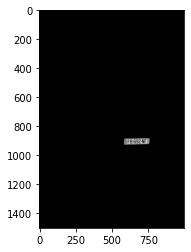

In [66]:
mask=[]

mask=np.zeros(gray_img.shape,np.uint8)
new_image= cv2.drawContours(mask, [location], 0,255,-1)
new_image= cv2.bitwise_and(IMAGE,IMAGE, mask=mask)
plt.imshow(new_image)

In [67]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_img[x1:x2+1, y1:y2+1]

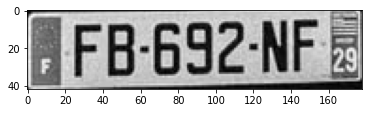

In [68]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [69]:
#Read images

In [70]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 0], [161, 0], [161, 41], [19, 41]], 'FB 692-NF', 0.46045073757334454)]

In [71]:
len(result)

1

FB 692-NF
FB 692-NF 


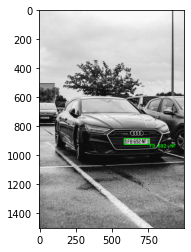

In [72]:
text_string=''

for i in range(len(result)):
    text = result[i][-2]
    text_string=text_string+text+' '
    print(text)
print(text_string)

#text = result[2][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(IMAGE, text=text_string, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(IMAGE, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
